In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

import glob
from PIL import Image
from scipy import interpolate

In [3]:
explogs = np.load("../experiments/28062023_baseline/explogs.npz")

In [3]:
use_gpu = True
str(use_gpu).lower()

'true'

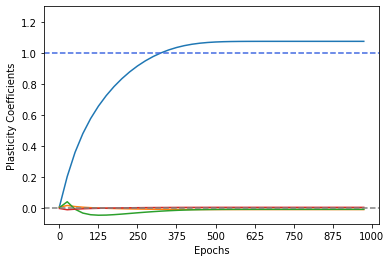

In [31]:
sns.lineplot(explogs["coeffs"][:,1,1,0])
sns.lineplot(explogs["coeffs"][:,1,0,0])
sns.lineplot(explogs["coeffs"][:,0,1,0])
sns.lineplot(explogs["coeffs"][:,0,0,0])

plt.xlabel('Epochs')
ticks = np.arange(0,41,5)
plt.xticks(ticks, labels= 25*ticks)
plt.axhline(y = 1., color = 'royalblue', linestyle = '--')
plt.axhline(y = 0., color = 'gray', linestyle = '--')
plt.ylim([-0.1, 1.3])

plt.ylabel('Plasticity Coefficients')
plt.savefig("coeffs.png", dpi=400)

In [48]:
explogs = np.load("../experiments/w_rewards_decay.npy")

In [49]:
explogs = explogs.squeeze()
explogs.shape

(240, 2)

In [41]:
explogs[:,1].shape

(240,)

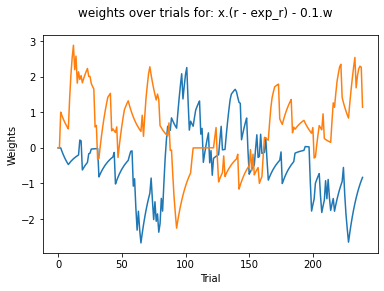

In [51]:
sns.lineplot(explogs[:,0])
sns.lineplot(explogs[:,1])

plt.xlabel('Trial')
ticks = np.arange(0,240,50)
plt.xticks(ticks, labels=ticks)
# plt.axhline(y = 1., color = 'royalblue', linestyle = '--')
# plt.axhline(y = 0., color = 'gray', linestyle = '--')
# plt.ylim([-0.1, 1.3])

plt.ylabel('Weights')
plt.suptitle('weights over trials for: x.(r - exp_r) - 0.1.w')
plt.savefig("weights-r-decay.png", dpi=400)

In [16]:
ticks = np.arange(0,41,5)
ticks

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40])

In [518]:
plasticity_rule = 'oja'

npzfile = np.load("/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/sparse_inputs/weight_trajectories_{}.npz".format(plasticity_rule))
weight_trajectories = npzfile['arr_0']

npzfile = np.load("/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/sparse_inputs/activity_trajectories_{}.npz".format(plasticity_rule))
activity_trajectories = npzfile['arr_0']

npzfile = np.load("/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/sparse_inputs/dw_trajectories_{}.npz".format(plasticity_rule))
dw_trajectories = npzfile['arr_0']

npzfile = np.load("/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/sparse_inputs/input_data_{}.npz".format(plasticity_rule))
input_data = npzfile['arr_0']

print(dw_trajectories.shape)
# (num_trajectories, len_trajec, w shape
i_th_trajec = 2

weight_trajec = weight_trajectories[i_th_trajec]
activity_trajec = activity_trajectories[i_th_trajec]
input_trajec = input_data[i_th_trajec]
dw_trajec = dw_trajectories[i_th_trajec]

(200, 50, 100, 5)


In [542]:
npzfile = np.load("/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/sparse_inputs/activity_trajectories_oja.npz")
activity_trajectories_oja = npzfile['arr_0']
npzfile = np.load("/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/sparse_inputs/activity_trajectories_custom.npz")
activity_trajectories_custom = npzfile['arr_0']

In [543]:
i_th_trajec = 0

activity_trajec_oja = activity_trajectories_oja[i_th_trajec]
activity_trajec_custom = activity_trajectories_custom[i_th_trajec]

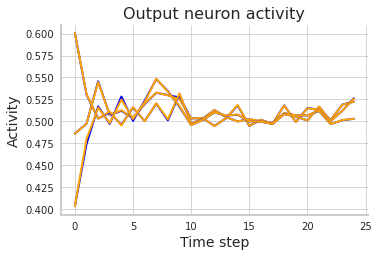

In [545]:
time_steps = 25
linewidth = 2

x = np.arange(0,time_steps,1)
fig, ax = plt.subplots(figsize=(5.5, 3.5))

plt.title("Output neuron activity", fontsize=16)
plt.xlabel("Time step", fontsize=14)
plt.ylabel("Activity", fontsize=14)

sns.set_style("whitegrid")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

num_outputs = 3
for i in range(num_outputs):
    sns.lineplot(x=x, y=activity_trajec_oja[:time_steps,i], linewidth=linewidth, color="blue")
    sns.lineplot(x=x, y=activity_trajec_custom[:time_steps,i], linewidth=linewidth, color="orange")

# plt.axvline(x=10, color='yellowgreen', linestyle='--', linewidth=linewidth*0.7, alpha=0.8)

# plt.show()
plt.savefig('imgs/ojaexps/yi_trajec', dpi=500)

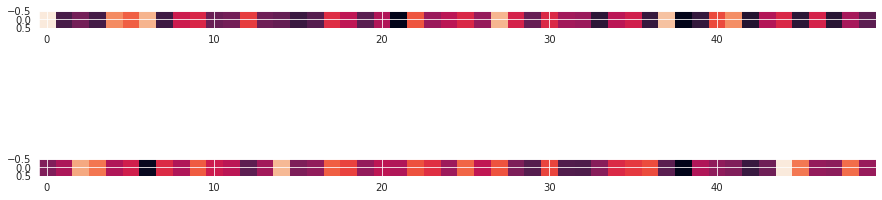

In [499]:
weights=50
time_step = 0

fig, ax = plt.subplots(2, 1, figsize=(15, 5))
pos = ax[0].imshow(weight_trajectories[0][time_step][:weights,0].reshape((1,weights)))
pos = ax[1].imshow(weight_trajectories[0][time_step][:weights,1].reshape((1,weights)))

plt.show()

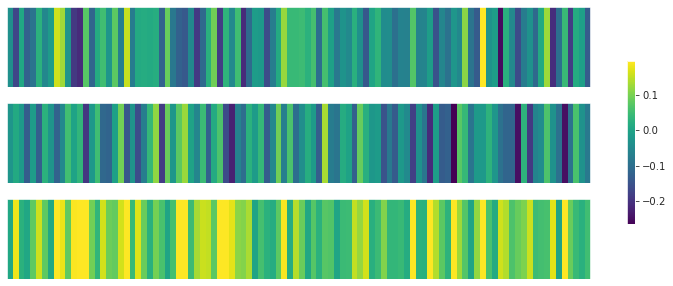

In [480]:
time_step = 49
weights=100

w_output1 = weight_trajectories[0][time_step][:weights,0].reshape((1,weights))
w_output2 = weight_trajectories[0][time_step][:weights,1].reshape((1,weights))
vmin = min(w_output1.min(), w_output2.min())
vmax = max(w_output1.max(), w_output2.max())

fig, axes = plt.subplots(3, 1, figsize=(15, 5))
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap='viridis'


for ax, data in zip(axes, [w_output1, w_output2, abs(w_output1 - w_output2)]):
    im = ax.imshow(data, cmap=cmap, norm=norm, aspect='auto')
    ax.set_yticks([])
    ax.set_xticks([])


fig.subplots_adjust(right=0.8)
fig.colorbar(im, ax=axes[:], shrink=0.6)

# plt.show()
plt.savefig('imgs/ojaexps/weights', dpi=500)

In [431]:
w_output1.min()

-0.028731544

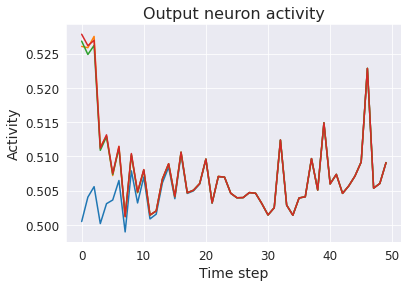

In [392]:
time_steps = 50

x = np.arange(0,time_steps,1)

# Set plot title and axes labels
plt.title("Output neuron activity", fontsize=16)
plt.xlabel("Time step", fontsize=14)
plt.ylabel("Activity", fontsize=14)

sns.set_style("darkgrid")

# Create lineplot
sns.lineplot(x=x, y=activity_trajec[:time_steps,0])
sns.lineplot(x=x, y=activity_trajec[:time_steps,1])
sns.lineplot(x=x, y=activity_trajec[:time_steps,2])
sns.lineplot(x=x, y=activity_trajec[:time_steps,3])


# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
# Show plot
# plt.savefig('imgs/ojaexps/yi_trajec', dpi=500)

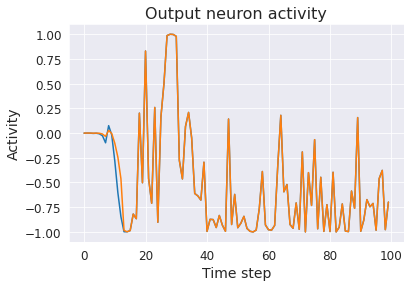

In [291]:
time_steps = np.arange(0,100,1)

# Set plot title and axes labels
plt.title("Output neuron activity", fontsize=16)
plt.xlabel("Time step", fontsize=14)
plt.ylabel("Activity", fontsize=14)

sns.set_style("darkgrid")

# Create lineplot
sns.lineplot(x=time_steps, y=activity_trajec[:100,0])
sns.lineplot(x=time_steps, y=activity_trajec[:100,1])


# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

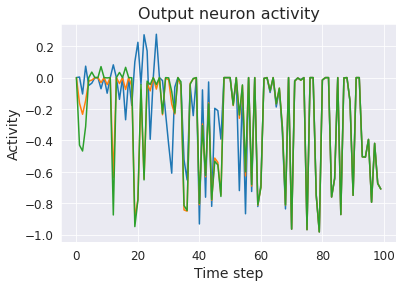

In [221]:
time_steps = np.arange(0,100,1)

# Set plot title and axes labels
plt.title("Output neuron activity", fontsize=16)
plt.xlabel("Time step", fontsize=14)
plt.ylabel("Activity", fontsize=14)

sns.set_style("darkgrid")

# Create lineplot
sns.lineplot(x=time_steps, y=activity_trajec[:,0])
sns.lineplot(x=time_steps, y=activity_trajec[:,1])
sns.lineplot(x=time_steps, y=activity_trajec[:,2])


# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

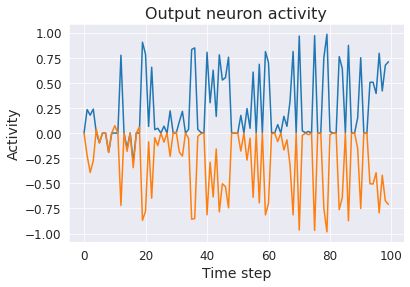

In [224]:
time_steps = np.arange(0,100,1)

# Set plot title and axes labels
plt.title("Output neuron activity", fontsize=16)
plt.xlabel("Time step", fontsize=14)
plt.ylabel("Activity", fontsize=14)

sns.set_style("darkgrid")

# Create lineplot
sns.lineplot(x=time_steps, y=activity_trajec[:,0])
sns.lineplot(x=time_steps, y=activity_trajec[:,1])


# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

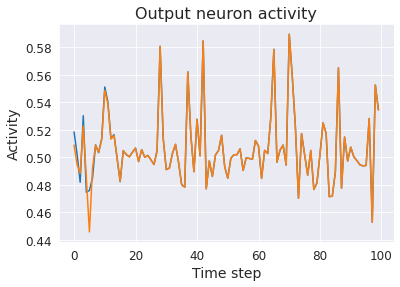

In [371]:
time_steps = np.arange(0,100,1)

# Set plot title and axes labels
plt.title("Output neuron activity", fontsize=16)
plt.xlabel("Time step", fontsize=14)
plt.ylabel("Activity", fontsize=14)

sns.set_style("darkgrid")

# Create lineplot
sns.lineplot(x=time_steps, y=activity_trajec[:,0])
sns.lineplot(x=time_steps, y=activity_trajec[:,1])


# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.savefig('imgs/ojaexps/yi_trajec', dpi=500)

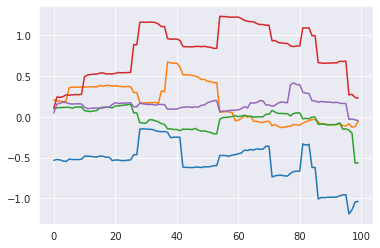

In [368]:
time_steps = np.arange(0,100,1)

for i in range(5):
    sns.lineplot(x=time_steps, y=weight_trajec[:,i,0])
    
plt.savefig('imgs/ojaexps/w1', dpi=500)

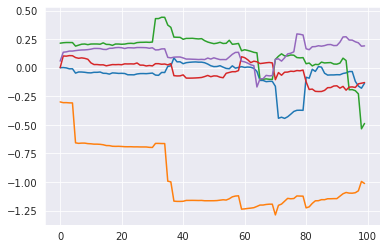

In [369]:
for i in range(5):
    sns.lineplot(x=time_steps, y=weight_trajec[:,i,1])

plt.savefig('imgs/ojaexps/w2', dpi=500)

<AxesSubplot:>

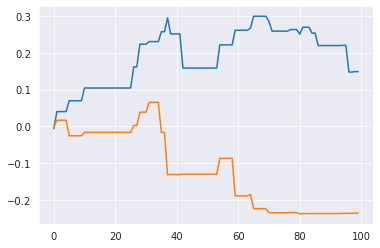

In [234]:
# weight_trajec[:40,:,0].mean(1)
# weight_trajec[:40,:,1].mean(1)
time_steps = np.arange(0,100,1)

sns.lineplot(x=time_steps, y=weight_trajec[:,:,0].mean(1))
sns.lineplot(x=time_steps, y=weight_trajec[:,:,1].mean(1))

In [200]:
# weight_trajec[:40,:,1]
weight_trajec[0,:,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

<AxesSubplot:>

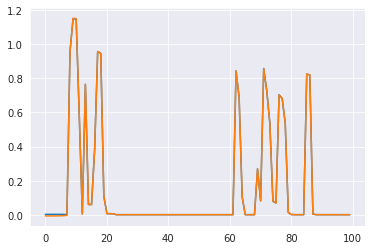

In [166]:
sns.lineplot(x=time_steps, y=weight_trajec[:,3,0])
sns.lineplot(x=time_steps, y=weight_trajec[:,3,1])

In [ ]:
aa = [ 6.2208213e-03,  1.6179580e-02,  3.1064503e-02,  7.1388081e-02,
        1.0940569e-01,  2.4906631e-01,  2.9076898e-01,  8.1273949e-01,
        1.9892637e+00, -1.6613765e+00,  9.1150713e+00, -1.6040291e+02,
       -5.4713460e+06,  8.6181780e+19]
bb = [-2.17242315e-02,  1.64425280e-02,  6.18303604e-02,  4.81129475e-02,
        1.33649215e-01,  2.75306761e-01,  3.28556538e-01,  8.15123141e-01,
        2.02200913e+00, -1.79183078e+00,  1.18432255e+01, -3.96719849e+02,
       -5.06958080e+07,  4.08425055e+22]

In [321]:
time_steps = np.arange(0,100,10)
df_w = pd.DataFrame(columns=time_steps)
df_dw = pd.DataFrame(columns=time_steps)

for i in time_steps:
    df_w[i] = pd.DataFrame({str(i): weight_trajec[i].squeeze()})
    df_dw[i] = pd.DataFrame({str(i): dw_trajec[i].squeeze()})

df_w.head()

,0,10,20,30,40,50,60,70,80,90
0,-0.007287,0.599275,0.168031,0.097398,0.696253,0.032031,0.444545,0.707242,0.129124,-0.048170
1,-0.038396,0.562583,-0.143582,-0.124482,-0.054516,-0.051261,-0.057593,0.049566,0.782694,-0.061139
2,-0.092471,0.193843,-0.001449,0.005115,0.050157,-0.115993,0.057721,-0.105614,-0.124032,-0.000293
3,0.060514,0.989171,-0.056189,-0.008203,-0.118710,-0.080467,-0.051419,0.181758,0.036665,0.048515
4,-0.000452,0.058728,0.063113,0.053640,-0.079241,-0.023601,0.107862,0.001797,0.088027,0.015948


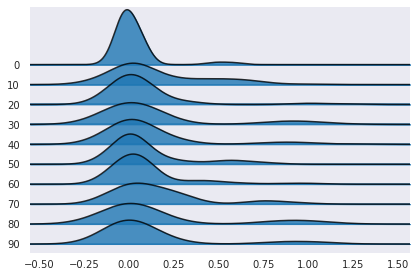

In [326]:
fig, axes = joypy.joyplot(df_w, alpha=0.8)
plt.savefig('imgs/ojaexps/w_funct', dpi=500)

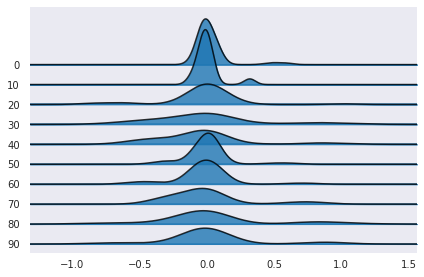

In [327]:
fig, axes = joypy.joyplot(df_dw, alpha=0.8)
plt.savefig('imgs/ojaexps/dw_funct', dpi=500)

In [89]:
activity_trajec_key1 = activity_trajec

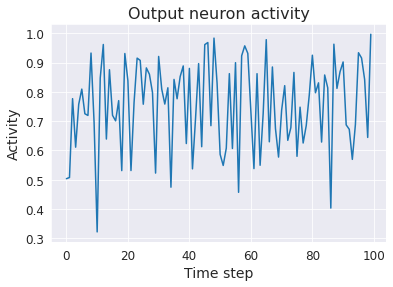

In [335]:
time_steps = np.arange(0,100,1)

# Set plot title and axes labels
plt.title("Output neuron activity", fontsize=16)
plt.xlabel("Time step", fontsize=14)
plt.ylabel("Activity", fontsize=14)

# sns.set_style("darkgrid")

# Create lineplot
sns.lineplot(x=time_steps, y=activity_trajec[:,0])
# sns.lineplot(x=time_steps, y=activity_trajec[:,1])
# sns.lineplot(x=time_steps, y=(activity_trajec[:,0] - activity_trajec[:,1]))

# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('imgs/ojaexps/y_funct', dpi=500)

NameError: name 'x' is not defined

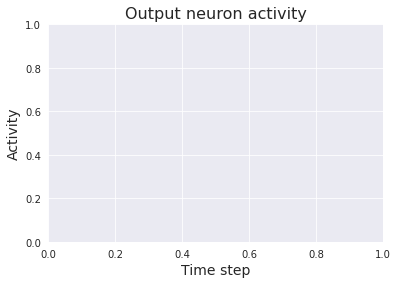

In [146]:
time_steps = np.arange(0,1000,1)

# Set plot title and axes labels
plt.title("Output neuron activity", fontsize=16)
plt.xlabel("Time step", fontsize=14)
plt.ylabel("Activity", fontsize=14)

sns.set_style("darkgrid")

bspline = interpolate.make_interp_spline(time_steps, activity_trajec[:,0])
y_new = bspline(ti)

# Create lineplot
sns.lineplot(x=time_steps, y=y_new)
sns.lineplot(x=time_steps, y=activity_trajec[:,1], errorbar="sd")
# sns.lineplot(x=time_steps, y=(activity_trajec[:,0] - activity_trajec[:,1]))

# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

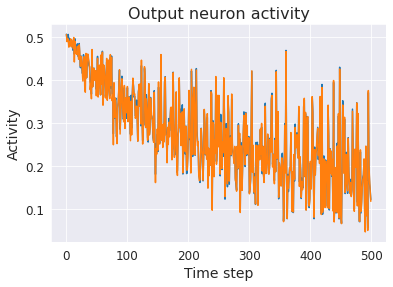

In [139]:
time_steps = np.arange(0,500,1)

# Set plot title and axes labels
plt.title("Output neuron activity", fontsize=16)
plt.xlabel("Time step", fontsize=14)
plt.ylabel("Activity", fontsize=14)

sns.set_style("darkgrid")

# Create lineplot
sns.lineplot(x=time_steps, y=activity_trajec[:,0])
sns.lineplot(x=time_steps, y=activity_trajec[:,1])
# sns.lineplot(x=time_steps, y=(activity_trajec[:,0] - activity_trajec[:,1]))

# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

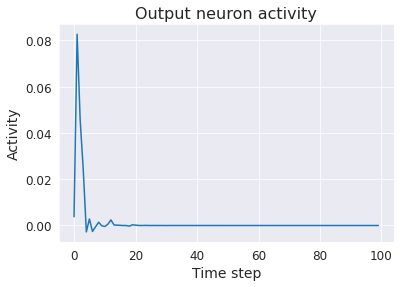

In [84]:
time_steps = np.arange(0,100,1)

# Set plot title and axes labels
plt.title("Output neuron activity", fontsize=16)
plt.xlabel("Time step", fontsize=14)
plt.ylabel("Activity", fontsize=14)

sns.set_style("darkgrid")

# Create lineplot
# sns.lineplot(x=time_steps, y=activity_trajec[time_steps].squeeze())
sns.lineplot(x=time_steps, y=(activity_trajec[:,0] - activity_trajec[:,1]))

# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

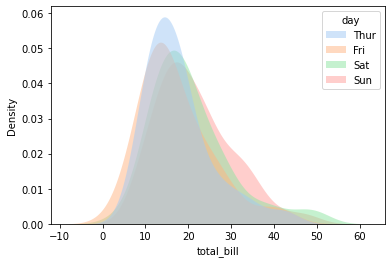

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = sns.load_dataset('tips')

# Create the plot using Seaborn's kdeplot function
sns.kdeplot(data=tips, x="total_bill", hue="day", fill=True, common_norm=False, alpha=.5, linewidth=0, palette="pastel")

# Show the plot
plt.show()

In [8]:
# 100 epochs
# 100 trajectories
# 100 trajec length
# 100 -> 20 network
data = pd.read_csv("/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/sparse_inputs/expdf.csv")
data.head()

,Unnamed: 0,loss,r2_score,epoch
0,0,1.042631,0.141364,0
1,1,0.696973,0.344369,1
2,2,0.587688,0.462834,2
3,3,0.509215,0.544301,3
4,4,0.445701,0.604997,4


In [9]:
npzfile = np.load("/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/sparse_inputs/student_coeffs.npz")
student_coefficients = npzfile['arr_0']

In [10]:
student_coefficients.shape

(100, 3, 3, 3)

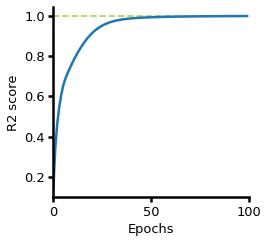

In [31]:
fontsize = 13
n_meta_it = 100
linewidth = 2.5
font = 'ariel'
fig, ax = plt.subplots(figsize=(3.5, 3.5))

plt.axhline(y=1, color='yellowgreen', linestyle='--', linewidth=linewidth*0.7, alpha=0.8)
ax.plot([i for i in range(100)], data['r2_score'], linewidth = linewidth)
            
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(linewidth)
ax.spines['left'].set_linewidth(linewidth)
ax.tick_params(width=linewidth, labelsize=fontsize, length=2*linewidth)
ax.set_xticks([0,int(n_meta_it/2), n_meta_it])
ax.set_xlim([0,n_meta_it])

ax.set_xlabel('Epochs', fontsize=fontsize, fontname="arial")
ax.set_ylabel('R2 score', fontsize=fontsize, fontname="arial")

for tick in ax.get_yticklabels():
    tick.set_fontname(font)
for tick in ax.get_xticklabels():
    tick.set_fontname(font)

plt.savefig('imgs/sparse_inputs/r2_score.png', dpi=500, bbox_inches="tight")

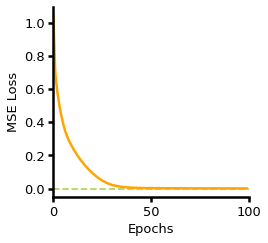

In [32]:
fontsize = 13
n_meta_it = 100
linewidth = 2.5
font = 'ariel'
fig, ax = plt.subplots(figsize=(3.5, 3.5))

plt.axhline(y=0, color='yellowgreen', linestyle='--', linewidth=linewidth*0.7, alpha=0.8)
ax.plot([i for i in range(100)], data['loss'], linewidth = linewidth, color='orange')
            
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(linewidth)
ax.spines['left'].set_linewidth(linewidth)
ax.tick_params(width=linewidth, labelsize=fontsize, length=2*linewidth)
ax.set_xticks([0,int(n_meta_it/2), n_meta_it])
ax.set_xlim([0,n_meta_it])

ax.set_xlabel('Epochs', fontsize=fontsize, fontname="arial")
ax.set_ylabel('MSE Loss', fontsize=fontsize, fontname="arial")

for tick in ax.get_yticklabels():
    tick.set_fontname(font)
for tick in ax.get_xticklabels():
    tick.set_fontname(font)

plt.savefig('imgs/sparse_inputs/loss.png', dpi=500, bbox_inches="tight")

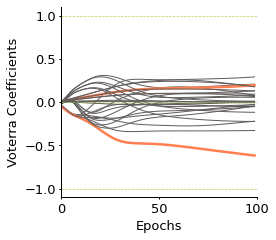

In [24]:
fontsize = 13
font = 'Arial'
n_meta_it = 100

fig, ax = plt.subplots(figsize=(3.5, 3.5))
plt.axhline(y=1, color='yellowgreen', linestyle='--', linewidth=linewidth*0.7, alpha=0.8)
plt.axhline(y=-1, color='yellowgreen', linestyle='--', linewidth=linewidth*0.7, alpha=0.8)

for i in range(3):
    for j in range(3):
        for k in range(3):    
            col = '#625D5D'
            linewidth = 1
            if i == 1 and j == 1 and k == 0:
                # col = '#4863A0'
                col = 'coral'
                linewidth = 2.5
            elif i == 0 and j == 2 and k == 1:
                # col = '#fdb462'
                col = 'coral'
                linewidth = 2.5
            ax.plot([i for i in range(100)], student_coefficients[:,i,j,k],color = col, linewidth = linewidth)
            
# ax.set_ylabel(r'$A$', fontname="arial", fontsize=fontsize , labelpad = 6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(linewidth)
ax.spines['left'].set_linewidth(linewidth)
ax.tick_params(width=linewidth, labelsize=fontsize, length=2*linewidth)
ax.set_xticks([0,int(n_meta_it/2), n_meta_it])

ax.set_xlabel('Epochs', fontsize=fontsize, fontname="arial")
ax.set_ylabel('Voterra Coefficients', fontsize=fontsize, fontname="arial")

ax.set_xlim([0,n_meta_it])
for tick in ax.get_yticklabels():
    tick.set_fontname(font)
for tick in ax.get_xticklabels():
    tick.set_fontname(font)

plt.axhline(y=0, color='yellowgreen', linestyle='--', linewidth=linewidth*0.7, alpha=0.8)
    
plt.savefig('imgs/sparse_inputs/student_coeffs.png', dpi=500, bbox_inches="tight")

In [59]:
epochs, m, n = del_w.shape

In [202]:
npzfile = np.load("/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/sparse_inputs/teacher_trajectories_random.npz")
teacher_trajectories = npzfile['arr_0']

In [58]:
npzfile = np.load("/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/sparse_inputs/final_weights_oja.npz")
final_weights = npzfile['arr_0']

print(final_weights[0].shape)

(100, 2)


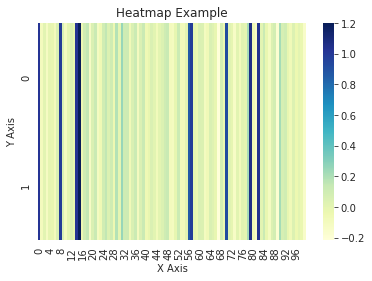

In [74]:
i = 0

sns.heatmap(np.transpose(final_weights[i], axes=None), cmap="YlGnBu", square=False)

# Set plot title and axes labels
plt.title("Heatmap Example")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

plt.show()
# plt.savefig('imgs/sparse_inputs/output_weights_random_10k.png'.format(i), dpi=500)

(20, 500)


Text(0, 0.5, 'Output Neuron')

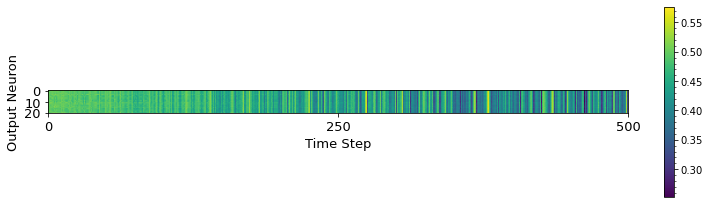

In [186]:
i = 15
teacher_trajectory = teacher_trajectories[i]
teacher_trajectory = np.swapaxes(teacher_trajectory, 0, 1)
print(teacher_trajectory.shape)

fig, ax = plt.subplots(figsize=(13, 5))
# pos = ax.imshow(teacher_trajectory, vmin=0.48, vmax=1)
pos = ax.imshow(teacher_trajectory)

plt.xticks(ticks=[0, 250, 500], labels=[0, 250, 500], fontsize=13, fontname='Arial')
plt.yticks(ticks=[0, 10, 19], labels=[0, 10, 20], fontsize=13, fontname='Arial')

# cbar = fig.colorbar(pos, ax=ax, anchor=(0, 0.3), shrink=0.7, ticks=[0.5, 1])
cbar = fig.colorbar(pos, ax=ax, shrink=0.7)
# cbar.ax.set_yticklabels(['0', '1e-3', '2e-3', '3e-3', '4e-3', '5e-3'])
cbar.minorticks_on()

ax.set_xlabel('Time Step', fontsize=fontsize, fontname="arial")
ax.set_ylabel('Output Neuron', fontsize=fontsize, fontname="arial")


# plt.savefig('imgs/sparse_inputs/output_random_1e-3.png'.format(i), dpi=500)

In [138]:
print(teacher_trajectory[:,3])

[0.51302046 0.52105886 0.5204506  0.5152734  0.52469265 0.51829267
 0.5197681  0.51667553 0.5210402  0.5146375  0.51638824 0.52173096
 0.52221555 0.5162704  0.5228382  0.5229558  0.52244186 0.51764035
 0.5185431  0.5203893 ]


(20, 10000)


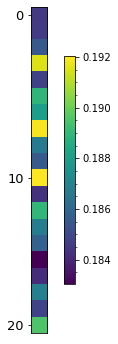

In [212]:
teacher_trajectory = teacher_trajectories[0]
teacher_trajectory = np.swapaxes(teacher_trajectory, 0, 1)
print(teacher_trajectory.shape)

time_step = 7000

fig, ax = plt.subplots(figsize=(6, 6))

pos = ax.imshow(np.reshape(teacher_trajectory[:,time_step], (20,1)))
# pos = ax.imshow(np.reshape(teacher_trajectory[:,time_step], (20,1)), vmin=0.30, vmax=0.34)
plt.yticks(ticks=[0, 10, 19], labels=[0, 10, 20], fontsize=13, fontname='Arial')
plt.xticks([])

cbar = fig.colorbar(pos, ax=ax, shrink=0.7)
cbar.minorticks_on()

# plt.savefig('imgs/sparse_inputs/output_activities_' + str(epoch) + '.png', dpi=500)

In [218]:
subset_trajec = teacher_trajectory[:,[0,500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 9999]]

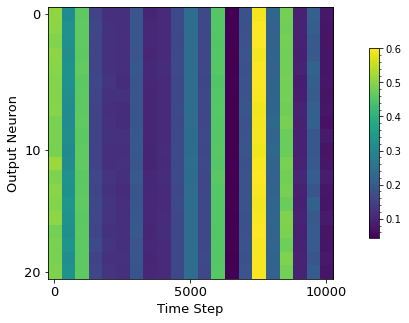

In [222]:
fig, ax = plt.subplots(figsize=(13, 5))
# pos = ax.imshow(teacher_trajectory, vmin=0.48, vmax=1)
pos = ax.imshow(subset_trajec)

plt.xticks(ticks=[0, 10, 20], labels=[0, 5000, 10000], fontsize=13, fontname='Arial')
plt.yticks(ticks=[0, 10, 19], labels=[0, 10, 20], fontsize=13, fontname='Arial')

# cbar = fig.colorbar(pos, ax=ax, anchor=(0, 0.3), shrink=0.7, ticks=[0.5, 1])
cbar = fig.colorbar(pos, ax=ax, shrink=0.7)
# cbar.ax.set_yticklabels(['0', '1e-3', '2e-3', '3e-3', '4e-3', '5e-3'])
cbar.minorticks_on()

ax.set_xlabel('Time Step', fontsize=fontsize, fontname="arial")
ax.set_ylabel('Output Neuron', fontsize=fontsize, fontname="arial")

plt.savefig('imgs/sparse_inputs/output_activities_10k' + '.png', dpi=500)

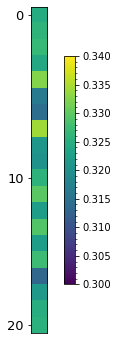

In [194]:
time_step = 499

fig, ax = plt.subplots(figsize=(6, 6))

# pos = ax.imshow(np.reshape(teacher_trajectory[:,time_step], (20,1)))
pos = ax.imshow(np.reshape(teacher_trajectory[:,time_step], (20,1)), vmin=0.30, vmax=0.34)
plt.yticks(ticks=[0, 10, 19], labels=[0, 10, 20], fontsize=13, fontname='Arial')
plt.xticks([])

cbar = fig.colorbar(pos, ax=ax, shrink=0.7)
cbar.minorticks_on()

In [94]:
teacher_trajectory[:,99]

array([0.8086674, 0.8086674, 0.8086674, 0.8086674, 0.8086674, 0.8086674,
       0.8086674, 0.8086674, 0.8086674, 0.8086674, 0.8086674, 0.8086674,
       0.8086674, 0.8086674, 0.8086674, 0.8086674, 0.8086674, 0.8086674,
       0.8086674, 0.8086674], dtype=float32)

In [61]:
def make_gif(frame_folder):
    images = sorted(glob.glob(f"{frame_folder}/*.jpg"))
    frames = [Image.open(image) for image in images]
    frame_one = frames[0]
    frame_one.save("delw_sameinit_evolution.gif", format="GIF", append_images=frames,
               save_all=True, duration=300, loop=0)

In [62]:
make_gif("imgs/delta_init")

In [66]:
npzfile = np.load("/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/del_w.npz")
del_w = npzfile['arr_0']

In [67]:
del_w.shape

(100, 100, 100)

In [68]:
for i in range(epochs):
    fig, ax = plt.subplots(figsize=(6, 6))
    pos = ax.imshow(del_w[i], vmin=0, vmax=del_w.max())
    plt.xticks(ticks=[0, 50, 100], labels=[0, 50, 100], fontsize=13, fontname='Arial')
    plt.yticks(ticks=[0, 50, 100], labels=[0, 50, 100], fontsize=13, fontname='Arial')
    # ax.xaxis.tick_top()
    # cbar = fig.colorbar(pos, ax=ax, anchor=(0, 0.3), shrink=0.7, ticks=[0.5, 1])
    cbar = fig.colorbar(pos, ax=ax, shrink=0.7, ticks=[0, 0.01, 0.02, 0.03])
    # cbar.ax.set_yticklabels(['0', '1e-3', '2e-3', '3e-3', '4e-3', '5e-3'])
    cbar.minorticks_on()

    plt.savefig('imgs/delta_init/' + str(i) + '.jpg', dpi=300)
    plt.close()

In [69]:
def make_gif(frame_folder):
    images = sorted(glob.glob(f"{frame_folder}/*.jpg"))
    frames = [Image.open(image) for image in images]
    frame_one = frames[0]
    frame_one.save("delw_diffinit_evolution.gif", format="GIF", append_images=frames,
               save_all=True, duration=300, loop=0)

In [70]:
make_gif("imgs/delta_init")

In [3]:
def plot_fig(img, vmin, vmax, file_name):
    fig, ax = plt.subplots(figsize=(6, 6))
    imshape = img.shape
    if len(imshape) == 1:
        img = img.reshape(imshape[0], 1)
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
        
    pos = ax.imshow(img, vmin=vmin, vmax=vmax)
    plt.yticks(ticks=[0, 9, 19], labels=[0, 10, 20], fontsize=13, fontname='Arial')
    if len(imshape) == 2:
        plt.xticks(ticks=[0, 9, 19], labels=[0, 10, 20], fontsize=13, fontname='Arial')
    
    # ax.xaxis.tick_top()
    # cbar = fig.colorbar(pos, ax=ax, anchor=(0, 0.3), shrink=0.7, ticks=[0.5, 1])
    cbar = fig.colorbar(pos, ax=ax, shrink=0.7)
    # cbar.ax.set_yticklabels(['0', '1e-3', '2e-3', '3e-3', '4e-3', '5e-3'])
    cbar.minorticks_on()

    plt.savefig(file_name, dpi=350)
    plt.close()

index:  0
index:  1
index:  2
index:  3
index:  4
index:  0
index:  10
index:  20
index:  30
index:  40
index:  0
index:  100
index:  200
index:  300
index:  400
index:  0
index:  1
index:  2
index:  3
index:  4
index:  0
index:  10
index:  20
index:  30
index:  40


<ipython-input-3-eade164ededd>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(6, 6))


index:  0
index:  100
index:  200
index:  300
index:  400
index:  0
index:  1
index:  2
index:  3
index:  4
index:  0
index:  10
index:  20
index:  30
index:  40
index:  0
index:  100
index:  200
index:  300
index:  400
index:  0
index:  1
index:  2
index:  3
index:  4
index:  0
index:  10
index:  20
index:  30
index:  40
index:  0
index:  100
index:  200
index:  300
index:  400


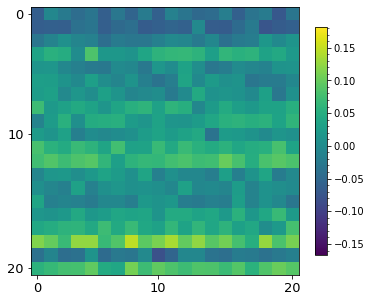

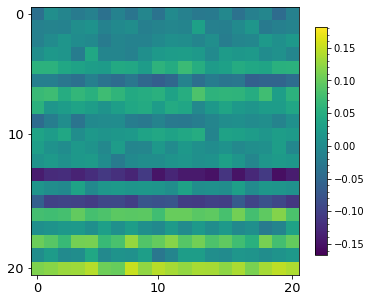

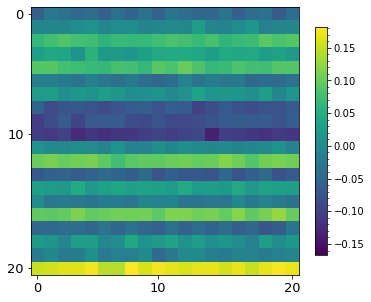

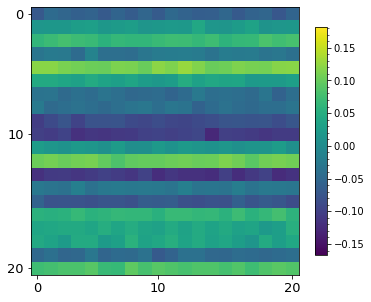

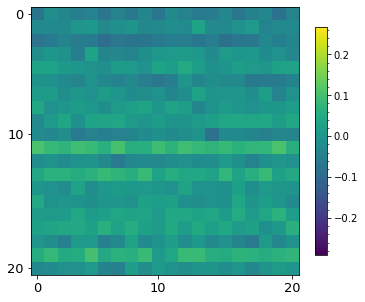

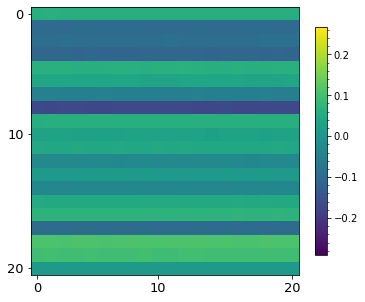

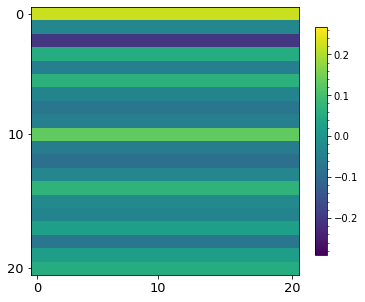

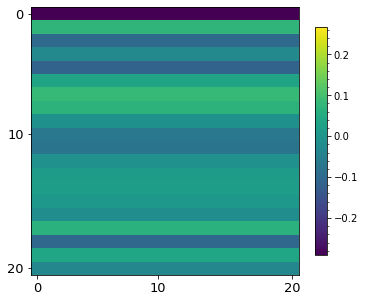

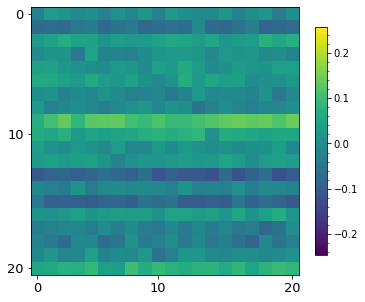

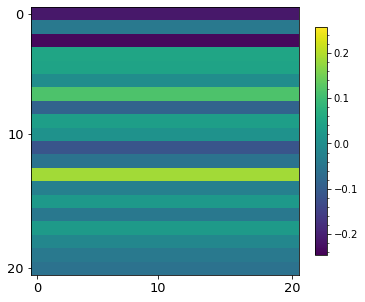

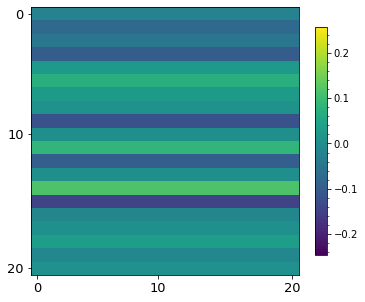

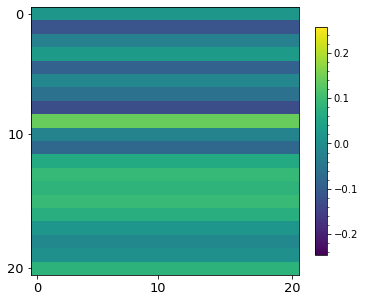

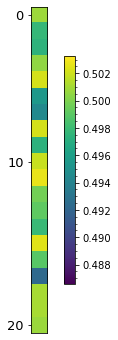

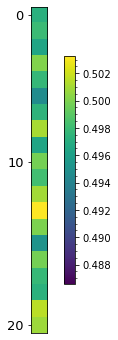

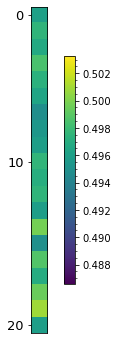

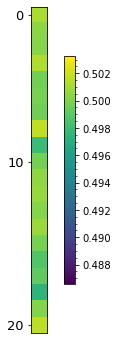

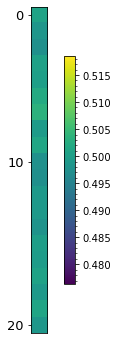

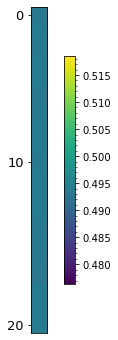

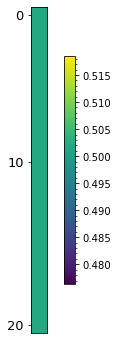

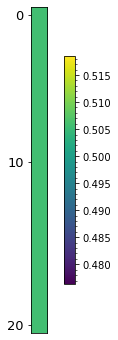

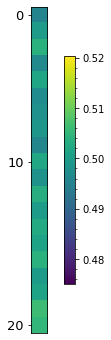

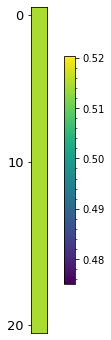

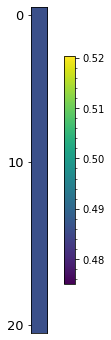

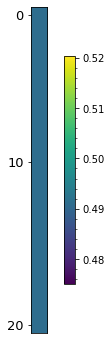

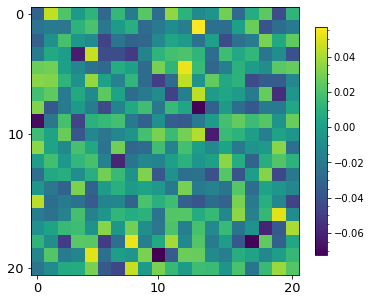

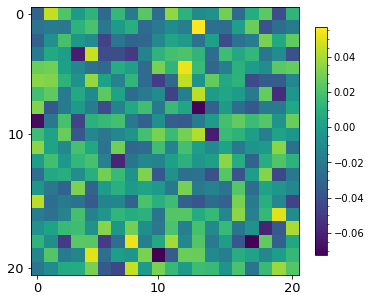

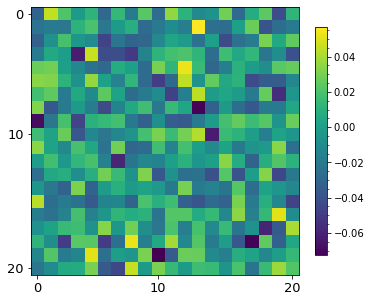

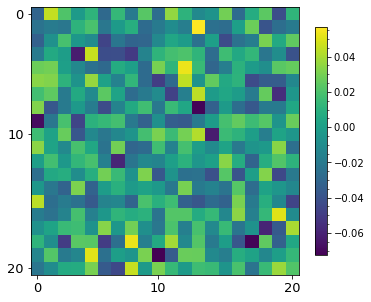

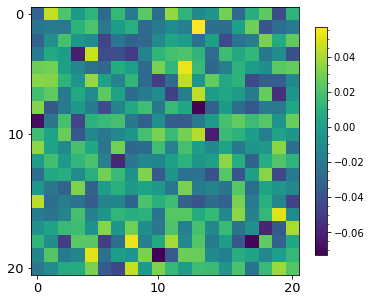

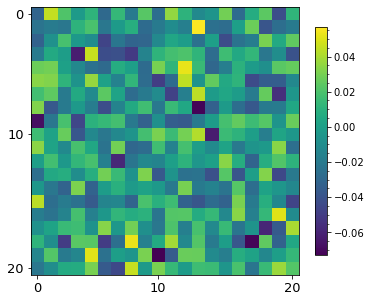

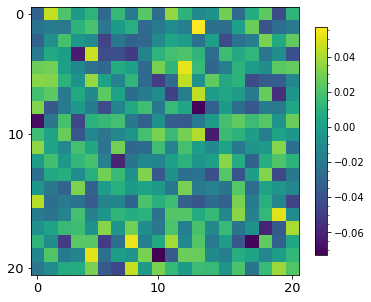

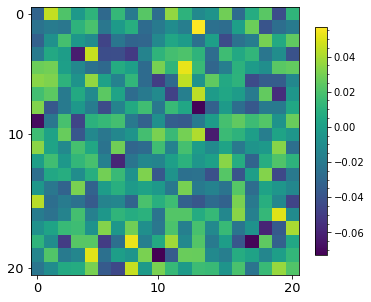

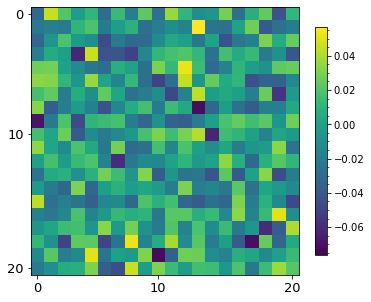

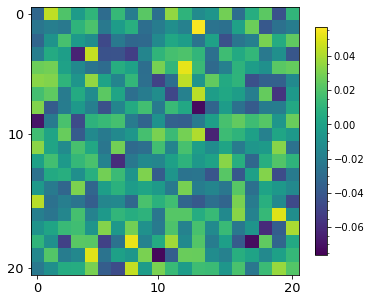

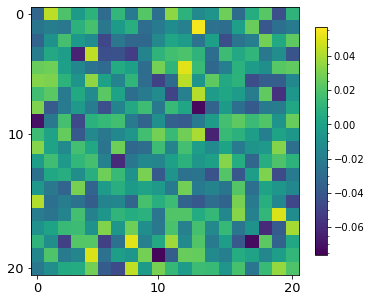

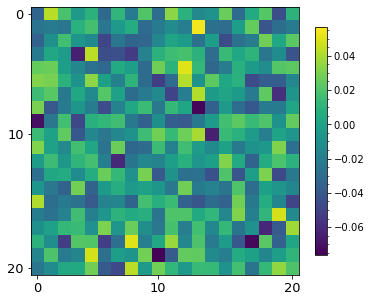

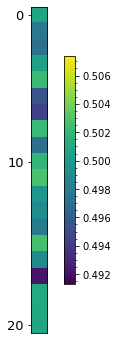

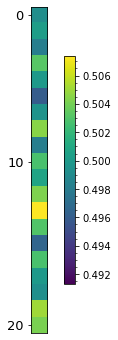

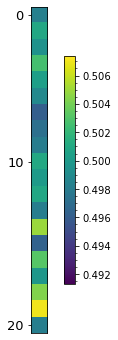

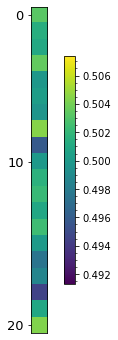

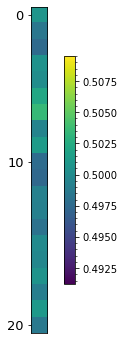

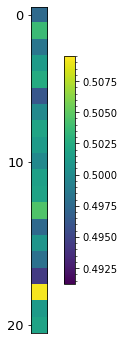

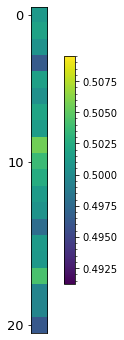

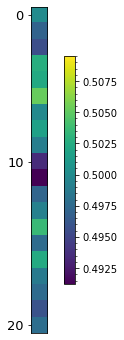

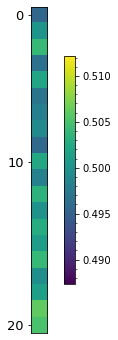

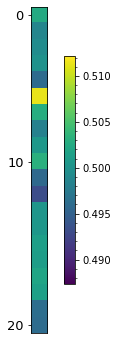

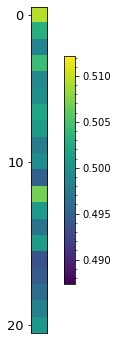

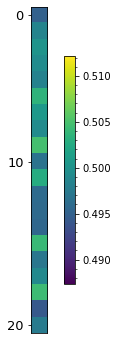

In [15]:
types = ['teacher_w', 'teacher_a', 'student_w', 'student_a']
len_trajecs = [5, 50, 500]
interval = [1, 10, 100]
file_path = "/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/trajec"

for imtype in types:        
    for e, len_trajec in enumerate(len_trajecs):
        npzfile = np.load("/groups/funke/home/mehtay/research/MetaLearnPlasticity/expdata/trajec/{}/{}.npz".format(len_trajec, imtype))
        imgs = npzfile['arr_0']
        vmax = imgs.max()
        vmin = imgs.min()
        for j in range(5):
            index = j*interval[e]
            print("index: ", index)
            plot_fig(imgs[index], vmin, vmax, file_path+'/{}/{}_{}.png'.format(len_trajec, imtype, index))
        plt.close()

In [4]:
for e, lenf in enumerate(types):
    print(e, lenf)

0 teacher_w
1 teacher_a
2 student_w
3 student_a


In [ ]:
for len_trajec in len_trajecs:
    for imtype